<a href="https://colab.research.google.com/github/danendrafau/ecommerce-dataset/blob/main/Proyek_Analisis_Data_ID_Camp_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** DANENDRA FAHAR UTAMA
- **Email:** danendrafaharutama@gmail.com
- **ID Dicoding:** danendrafau

## Menentukan Pertanyaan Bisnis

- Bagaimana pola dan perubahan dalam aktivitas pemesanan pelanggan dari waktu ke waktu?
- Produk dalam kategori apa saja yang paling sering dan paling jarang dipesan?
- Siapa pelanggan yang paling sering melakukan pemesanan, serta bagaimana distribusi pelanggan berdasarkan kota dan negara bagian?
- Siapa penjual yang memiliki volume penjualan tertinggi, serta bagaimana distribusi penjual berdasarkan kota dan negara bagian?

## Import Semua Packages/Library yang Digunakan

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Sumber: [Kaggle/Olistbr](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

In [187]:
#import data ke customer_df
customers_df = pd.read_csv('https://raw.githubusercontent.com/danendrafau/ecommerce-dataset/97741040e115ffc5edb353dff9b76b83f3980100/data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [188]:
#import data ke sellers_df
sellers_df = pd.read_csv('https://raw.githubusercontent.com/danendrafau/ecommerce-dataset/97741040e115ffc5edb353dff9b76b83f3980100/data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [189]:
#import data ke products_df
products_df = pd.read_csv('https://raw.githubusercontent.com/danendrafau/ecommerce-dataset/refs/heads/main/data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [190]:
#import data ke products_translate_df (menjadi bahasa inggris)
products_translate_df = pd.read_csv('https://raw.githubusercontent.com/danendrafau/ecommerce-dataset/refs/heads/main/data/product_category_name_translation.csv')
products_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [191]:
#import data ke orders_df
orders_df = pd.read_csv('https://raw.githubusercontent.com/danendrafau/ecommerce-dataset/refs/heads/main/data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [192]:
#import data ke order_items_df
order_items_df = pd.read_csv('https://raw.githubusercontent.com/danendrafau/ecommerce-dataset/refs/heads/main/data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [193]:
#join 4 tabel order_items_df, sellers_df, products_df, products_translate_df
join_df1 = pd.merge(
    pd.merge(
        order_items_df, sellers_df,
        how = "left", on='seller_id'
        ),
    pd.merge(
        products_df, products_translate_df,
        how = "left",
        on='product_category_name'
        ),
    how="left",
    on="product_id"
    )
print('Banyak baris dan kolom join_df1:', join_df1.shape)
join_df1.head()

Banyak baris dan kolom join_df1: (112650, 19)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [194]:
#join tabel orders_df dan customers_df
join_df2 = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
print('Banyak baris dan kolom join_df2:', join_df2.shape)
join_df2.head()

Banyak baris dan kolom join_df2: (99441, 12)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


**Insight:**
*product_translate_df* diperlukan agar nama produk yang akan dihubungkan dengan *order_id* dapat terbaca dengan bahasa yang umum dimengerti (bahasa inggris)

### Assessing Data

In [195]:
#cek data duplikat tabel join_df1
print('Jumlah data duplikat: ', join_df1.duplicated().sum())
join_df1.info()

Jumlah data duplikat:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   seller_zip_code_prefix         112650 non-null  int64  
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
 10  product_category_name          111047 non-null  object 
 11  product_name_lenght            111047 non-null  float64
 12  produ

**Insight:**
Tidak ada data duplikat dan data tidak lengkap

In [196]:
#cek missing value tabel join_df1
join_df1.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


**Insight:**
Ada beberapa kolom missing value pada kolom yang akan digunakan nantinya, yaitu *product_category_name* dan *product_category_name_english*

In [197]:
#cek deskripsi statistik tabel join_df1
join_df1.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,112650.0,NaN,NaN,NaN,1.197834,0.705124,1.0,1.0,1.0,1.0,21.0
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,112650.0,NaN,NaN,NaN,120.653739,183.633928,0.85,39.9,74.99,134.9,6735.0
freight_value,112650.0,NaN,NaN,NaN,19.99032,15.806405,0.0,13.08,16.26,21.15,409.68
seller_zip_code_prefix,112650.0,NaN,NaN,NaN,24439.170431,27596.030909,1001.0,6429.0,13568.0,27930.0,99730.0
seller_city,112650,611,sao paulo,27983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,112650,23,SP,80342,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**
- Kolom *price* memiliki batas bawah 0,85 dan batas atas 6.735
- Kolom *fright_value* memiliki batas bawah 0 dan batas atas 409,68
- Kolom *product_name_length* sampai *product_width_cm* tidak terpakai, sehingga dihapus

In [198]:
#cek data duplikat tabel join_df2
print('Jumlah duplikasi data: ', join_df2.duplicated().sum())
join_df2.info()

Jumlah duplikasi data:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usa

**Insight:** Tidak ada data duplikat dan data tidak lengkap

In [199]:
#cek missing value tabel orders_df
join_df2.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0
customer_unique_id,0
customer_zip_code_prefix,0


**Insight:** Ada missing value pada kolom waktu dan tanggal

In [200]:
#cek deskripsi statistik tabel join_df2
join_df2.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99281,97658,96476,99441,99441,99441.000000,99441,99441
unique,99441,99441,8,98875,90733,81018,95664,459,96096,NaN,4119,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,96478,3,9,47,3,522,17,NaN,15540,41746
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58900.000000,NaN,NaN


**Insight:** Nama kota dan negara bagian harus dirapikan

### Cleaning Data

In [201]:
#Capitalize each word di kolom seller_city
seller_city_name = []
for i in range(0, len(join_df1["seller_city"])):
  a = " ".join([s.capitalize() if s.lower() not in "da|de|do|das|dos" else s for s in join_df1["seller_city"][i].split()])
  seller_city_name.append(a)

join_df1["seller_city"] = pd.DataFrame(seller_city_name)

In [202]:
#Capitalize each word di kolom customer_city
city_name = []
for i in range(0, len(join_df2["customer_city"])):
  a = " ".join([s.capitalize() if s.lower() not in "da|de|do|das|dos" else s for s in join_df2["customer_city"][i].split()])
  city_name.append(a)

join_df2["customer_city"] = pd.DataFrame(city_name)

In [203]:
#Nama negara bagian asli dari singkatan kolom customer_state dan seller_state
#Sumber: https://www.drupal.org/node/2559551
state_name = {
"AC" : "Acre",
"AL" : "Alagoas",
"AM" : "Amazonas",
"AP" : "Amapa",
"BA" : "Bahia",
"CE" : "Ceara",
"DF" : "Distrito Federal",
"ES" : "Espirito Santo",
"GO" : "Goias",
"MA" : "Maranhao",
"MG" : "Minas Gerais",
"MS" : "Mato Grosso do Sul",
"MT" : "Mato Grosso",
"PA" : "Para",
"PB" : "Paraiba",
"PE" : "Pernambuco",
"PI" : "Piaui",
"PR" : "Parana",
"RJ" : "Rio de Janeiro",
"RN" : "Rio Grande do Norte",
"RO" : "Rondonia",
"RR" : "Roraima",
"RS" : "Rio Grande do Sul",
"SC" : "Santa Catarina",
"SE" : "Sergipe",
"SP" : "Sao Paulo",
"TO" : "Tocantins"
}

join_df1['seller_state'] = join_df1['seller_state'].map(state_name)
join_df2['customer_state'] = join_df2['customer_state'].map(state_name)
join_df2[['customer_city','customer_state']].head()

,customer_city,customer_state
0,Sao Paulo,Sao Paulo
1,Barreiras,Bahia
2,Vianopolis,Goias
3,Sao Goncalo do Amarante,Rio Grande do Norte
4,Santo Andre,Sao Paulo


In [204]:
join_df1[['seller_city','seller_state']].head()

,seller_city,seller_state
0,Volta Redonda,Sao Paulo
1,Sao Paulo,Sao Paulo
2,Borda da Mata,Minas Gerais
3,Franca,Sao Paulo
4,Loanda,Parana


**Insight:**
- Data kolom *seller_city* dan *seller_state* pada *join_df1* sudah rapi.
- Data kolom *customer_city* dan *customer_state* di tabel *join_df2* sudah rapi.

In [205]:
print("Banyak NaN pada kolom product_category_name_english:", join_df1.product_category_name_english.isnull().sum())
print("Banyak NaN pada kolom product_category_name_english, tapi tidak NaN pada kolom product_category_name:",
      join_df1.product_category_name_english.loc[join_df1.product_category_name_english.isna() &
                                                   join_df1.product_category_name.notnull()].isnull().sum())

#cek unique value kolom product_category_name yang tidak bernilai pada kolom product_category_name_english
join_df1.product_category_name.loc[join_df1.product_category_name_english.isna() & join_df1.product_category_name.notnull()].unique()

Banyak NaN pada kolom product_category_name_english: 1627
Banyak NaN pada kolom product_category_name_english, tapi tidak NaN pada kolom product_category_name: 24


array(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
      dtype=object)

In [206]:
join_df1[['product_category_name','product_category_name_english']].loc[join_df1.product_category_name.isna()].reset_index()

,index,product_category_name,product_category_name_english
0,123,NaN,NaN
1,125,NaN,NaN
2,132,NaN,NaN
3,142,NaN,NaN
4,171,NaN,NaN
...,...,...,...
1598,112306,NaN,NaN
1599,112333,NaN,NaN
1600,112350,NaN,NaN
1601,112438,NaN,NaN


**Insight:** Ada 1603 baris missing value pada kedua kolom, yaitu *product_category_name* dan *product_category_name_english*.

In [207]:
#looping list index hasil slicing dan isi missing value dengan kondisi dari kolom product_category_name
for i in list(join_df1.loc[join_df1.product_category_name_english.isna()].index):
  if join_df1['product_category_name'].iloc[i] == 'pc_gamer':
    join_df1['product_category_name_english'].iloc[i] = 'pc_gaming'
  elif join_df1['product_category_name'].iloc[i] == 'portateis_cozinha_e_preparadores_de_alimentos':
    join_df1['product_category_name_english'].iloc[i] = 'portable_kitchen_and_food_preparers'
  else:
    join_df1['product_category_name_english'].iloc[i] = 'other_products' #missing value akan diisi dengan other_products

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  join_df1['product_category_name_english'].iloc[i] = 'other_products' #missing value akan diisi dengan other_products
<ipython-input-207-8c066b0b614a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_df1['product_category_name_english'].iloc[i] = 'other_products' #missing value akan diisi dengan other_products
<ipython-input-207-8c066b0b614a>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never w

In [208]:
#Menghilangkan separator (_) dan capitalize each word pada kolom product_category_name_english
#Assign ke kolom baru dengan label product_category
category_name = []
for i in range(0, len(join_df1["product_category_name_english"])):
  a = " ".join([s.capitalize() if s.lower() != "and" else s for s in join_df1["product_category_name_english"][i].split("_")])
  category_name.append(a)

join_df1["product_category"] = pd.DataFrame(category_name)
join_df1[["product_category_name_english","product_category"]].head()

,product_category_name_english,product_category
0,cool_stuff,Cool Stuff
1,pet_shop,Pet Shop
2,furniture_decor,Furniture Decor
3,perfumery,Perfumery
4,garden_tools,Garden Tools


In [209]:
#cek ulang missing value
join_df1.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [210]:
#Hapus kolom yang tidak perlu dan cek ulang missing value
join_df1 = join_df1.drop(join_df1.columns[[4,7]] ,axis=1).drop(join_df1.iloc[:, 10:19] ,axis=1)
join_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   freight_value     112650 non-null  float64
 6   seller_city       112650 non-null  object 
 7   seller_state      112650 non-null  object 
 8   product_category  112650 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.7+ MB


**Insight:** Data tabel join_df2 telah bersih

In [211]:
#Ganti nama kolom tangga
join_df2 = join_df2.rename(columns={"order_purchase_timestamp": "order_date",
                                        "order_approved_at": "approved_date",
                                        "order_delivered_carrier_date": "shipped_date",
                                        "order_delivered_customer_date": "delivery_date"}
                               )

In [212]:
#Hapus kolom customer_zip_code_prefix
join_df2 = join_df2.drop(columns= ['customer_zip_code_prefix','order_estimated_delivery_date'], axis=1)

In [213]:
#Ubah tipe data objects jadi datetime dengan for
dt_columns = ['order_date', 'approved_date', 'shipped_date', 'delivery_date']

for column in dt_columns:
  join_df2[column] = pd.to_datetime(join_df2[column])

join_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            99441 non-null  object        
 1   customer_id         99441 non-null  object        
 2   order_status        99441 non-null  object        
 3   order_date          99441 non-null  datetime64[ns]
 4   approved_date       99281 non-null  datetime64[ns]
 5   shipped_date        97658 non-null  datetime64[ns]
 6   delivery_date       96476 non-null  datetime64[ns]
 7   customer_unique_id  99441 non-null  object        
 8   customer_city       99441 non-null  object        
 9   customer_state      99441 non-null  object        
dtypes: datetime64[ns](4), object(6)
memory usage: 7.6+ MB


**Insight:** Semua data telah bersih dan siap digabung.

In [214]:
#Gabung ke join_table_df
join_table_df = pd.merge(
    right=join_df1,
    left=join_df2,
    how="right",
    right_on="order_id",
    left_on="order_id",
)
print('Jumlah baris dan kolom join_table_df:', join_table_df.shape)
join_table_df.head()

Jumlah baris dan kolom join_table_df: (112650, 18)


,order_id,customer_id,order_status,order_date,approved_date,shipped_date,delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,Campos dos Goytacazes,Rio de Janeiro,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,Volta Redonda,Sao Paulo,Cool Stuff
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,Santa Fe do Sul,Sao Paulo,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,Sao Paulo,Sao Paulo,Pet Shop
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,Para de Minas,Minas Gerais,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,Borda da Mata,Minas Gerais,Furniture Decor
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,Atibaia,Sao Paulo,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,Franca,Sao Paulo,Perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,Varzea Paulista,Sao Paulo,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,Loanda,Parana,Garden Tools


In [215]:
#Tambah kolom total_order_value (hasil jumlah kolom price dan freight_value)
join_table_df.insert(15, "total_order_value", join_table_df.price + join_table_df.freight_value)

In [216]:
#Mcek tabel join_table_df
join_table_df.info()
print('\nJumlah missing value join_table_df:\n', join_table_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            112650 non-null  object        
 1   customer_id         112650 non-null  object        
 2   order_status        112650 non-null  object        
 3   order_date          112650 non-null  datetime64[ns]
 4   approved_date       112635 non-null  datetime64[ns]
 5   shipped_date        111456 non-null  datetime64[ns]
 6   delivery_date       110196 non-null  datetime64[ns]
 7   customer_unique_id  112650 non-null  object        
 8   customer_city       112650 non-null  object        
 9   customer_state      112650 non-null  object        
 10  order_item_id       112650 non-null  int64         
 11  product_id          112650 non-null  object        
 12  seller_id           112650 non-null  object        
 13  price               112650 no

**Insight:** Missing value yang tersisa hanya di kolom yang tidak terlalu terpakai

In [217]:
#Cek count unique dari order_status
join_table_df.order_status.value_counts()

,count
order_status,
delivered,110197
shipped,1185
canceled,542
invoiced,359
processing,357
unavailable,7
approved,3


**Insight:** Baris dengan data "Canceled" dan "Unavailable" akan dihapus karena tidak digunakan.

In [218]:
#Menghapus baris yang bernilai 'canceled' dan 'unavailable' pada order_status
join_table_df = join_table_df.drop(join_table_df[join_table_df['order_status'].isin(['canceled', 'unavailable'])].index)
join_table_df.sample(5)

,order_id,customer_id,order_status,order_date,approved_date,shipped_date,delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,total_order_value,seller_city,seller_state,product_category
70910,a1c47ee60da7efa582a5da058796df50,cc48ccc7941ecfdb38d051e94d34f7ee,delivered,2018-05-02 12:17:34,2018-05-02 12:33:43,2018-05-02 14:26:00,2018-05-08 15:06:41,84b9cbf4762003e2f4a4aeacd0819c34,Recife,Pernambuco,1,c72edc98e7d77f0c4c04ec80730c05f5,5b925e1d006e9476d738aa200751b73b,65.0,22.51,87.51,Sao Paulo,Sao Paulo,Sports Leisure
15090,2260cb2dc43ff44ab9b095424034c741,04d5cb41e92cebd0f1051d38c10f5ec4,delivered,2018-03-19 12:02:43,2018-03-19 12:10:37,2018-03-20 22:42:00,2018-03-21 15:05:11,ebfa7b208d48a86c037760d5676584b7,Osasco,Sao Paulo,1,3bebad3cf2c8d1a8d3ce97174643e054,955fee9216a65b617aa5c0531780ce60,19.5,8.29,27.79,Sao Paulo,Sao Paulo,Agro Industry and Commerce
32244,491830ceac81983791103aca18acb421,c4f1317436470834f2e69cc5cf9ea53f,delivered,2018-03-24 11:58:45,2018-03-24 12:08:20,2018-03-26 19:36:44,2018-03-28 23:48:41,22a63b86837d5fc401b57324c67007d6,Indaiatuba,Sao Paulo,1,5292d2a10d727811b78d5b7dfb6c96b3,8a130737016f838139d31878787a39c9,49.6,8.29,57.89,Sao Paulo,Sao Paulo,Construction Tools Construction
39261,593dcbc6068648f021eb48b2d55ae96c,c14a1f8f7ebc33fced32cd35f5e4b385,delivered,2017-07-25 19:19:03,2017-07-25 19:31:24,2017-07-26 20:14:03,2017-08-01 17:23:57,94f8078fdb27aa4d2b5865d1da53a27f,Registro,Sao Paulo,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,40.0,11.85,51.85,Atibaia,Sao Paulo,Auto
105055,eeaa75133a2e3ef15f077511708f7052,f70758e1085f84f6c842270af455ab06,delivered,2018-01-11 16:07:22,2018-01-11 16:15:29,2018-01-16 00:06:43,2018-01-22 21:54:55,2ec5e93fe922b65036198423712d6867,Ribeirao Preto,Sao Paulo,1,54d9ac713e253fa1fae9c8003b011c2a,955fee9216a65b617aa5c0531780ce60,29.5,15.98,45.48,Sao Paulo,Sao Paulo,Cool Stuff


In [219]:
#cek count unique order_status
join_table_df.order_status.value_counts()

,count
order_status,
delivered,110197
shipped,1185
invoiced,359
processing,357
approved,3


In [220]:
#cek missing value join_table_df setelah penghapusan baris
join_table_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_date,0
approved_date,15
shipped_date,721
delivery_date,1912
customer_unique_id,0
customer_city,0
customer_state,0


In [221]:
#Membuat kolom baru dengan kolom order_date dari join_table_df dan menambahkan beberapa kolom waktu
join_table_df.insert(3,'hour_order', join_table_df['order_date'].apply(lambda x: x.hour))

hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
join_table_df.insert(4,'daytime_order', (pd.cut(join_table_df['hour_order'], hours_bins, labels=hours_labels)))

join_table_df.insert(5,'day_order', join_table_df['order_date'].dt.strftime('%A'))
join_table_df.insert(6,'date_order', join_table_df['order_date'].dt.strftime('%d'))
join_table_df.insert(7,'month_order', join_table_df['order_date'].dt.strftime('%m-%Y'))

join_table_df.sample(10)

,order_id,customer_id,order_status,hour_order,daytime_order,day_order,date_order,month_order,order_date,approved_date,...,customer_state,order_item_id,product_id,seller_id,price,freight_value,total_order_value,seller_city,seller_state,product_category
31349,4724d70419b2219c68e4ae60a03738f7,61cf203eb54db88ac8160700870481de,delivered,12,Morning,Monday,06,02-2017,2017-02-06 12:20:35,2017-02-06 12:32:45,...,Sao Paulo,1,edaa2bd93560f6d79e10b21fa2858004,391fc6631aebcf3004804e51b40bcf1e,118.75,16.98,135.73,Ibitinga,Sao Paulo,Furniture Decor
90820,ce4a4ff7ae292d2a9b3f36c017a82914,7e779148dc9ac9f7a27f32ba4025f03b,delivered,20,Night,Sunday,04,02-2018,2018-02-04 20:00:35,2018-02-04 20:24:20,...,Sao Paulo,1,66a0a6e02b7f543e5b021ce361f267d4,7a67c85e85bb2ce8582c35f2203ad736,139.99,12.18,152.17,Sao Paulo,Sao Paulo,Cool Stuff
17821,28dc400a3035ba60273edf910c7c05f4,2ccb9ee4137ad183fc9df5261f3cb7de,delivered,13,Afternoon,Wednesday,25,10-2017,2017-10-25 13:15:45,2017-10-25 13:28:30,...,Sao Paulo,1,4cac1a12a6fe9ffba4a9556dbe582e28,7ddcbb64b5bc1ef36ca8c151f6ec77df,25.99,8.72,34.71,Sao Paulo,Sao Paulo,Auto
32297,4932f0177140a9a8b32264ac6f41ac5f,da60a83676f4f423d010e046d2e19638,delivered,22,Night,Friday,14,04-2017,2017-04-14 22:28:12,2017-04-14 22:42:13,...,Sao Paulo,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,59.90,14.59,74.49,Petropolis,Rio de Janeiro,Perfumery
29229,427bdcc4eb03caf53fde12f57a84d443,0f5cb52a437e2f6062863423966ccb54,delivered,14,Afternoon,Wednesday,06,06-2018,2018-06-06 14:47:29,2018-06-06 15:12:55,...,Sao Paulo,3,7088744b00831b410bd17716cb578f39,41b14765bd56c8ad10971074380f9c0c,34.50,13.71,48.21,Santo Andre,Sao Paulo,Computers Accessories
61266,8ba3b1fe7aa3cefdeb39bbc9a822b1cf,b8cf1fd043cb02e585aa685b0563f2ea,shipped,21,Night,Sunday,06,05-2018,2018-05-06 21:07:07,2018-05-08 19:34:50,...,Sao Paulo,1,d285360f29ac7fd97640bf0baef03de0,7d13fca15225358621be4086e1eb0964,278.00,14.39,292.39,Ribeirao Preto,Sao Paulo,Watches Gifts
26926,3d4359c9a8031f632995e7923608dd4d,a7b54e5d33e657bd68a2d411fbace435,delivered,15,Afternoon,Friday,27,07-2018,2018-07-27 15:25:51,2018-07-27 15:35:19,...,Sao Paulo,1,9c1f132d460c48b30f756f3585d4a894,921323538c9f1c4e816f2720eac02bea,119.90,9.59,129.49,Sao Paulo,Sao Paulo,Sports Leisure
4370,09d8753e77ffa5e71ba4137166a3b6ad,e7d78126dbaaf94ed755304738b6b645,delivered,17,Afternoon,Sunday,05,11-2017,2017-11-05 17:41:50,2017-11-05 17:55:22,...,Rondonia,1,563e96ec3515e6a7048ebcebffcaf1ba,59b22a78efb79a4797979612b885db36,379.00,74.50,453.50,Uberlandia,Minas Gerais,Construction Tools Construction
88502,c8fe12f276a71635e2f929eac9d2d21e,e7a1ded8a16fdf3a7676b01a71d55b78,delivered,11,Morning,Friday,22,09-2017,2017-09-22 11:57:46,2017-09-22 12:10:16,...,Rio de Janeiro,1,cd1db0c97e4b3644bb52432611e09c58,e8f6dc8e6a1dcde89d20e3995c8d90b3,105.90,114.39,220.29,Sao Paulo,Sao Paulo,Furniture Decor
38693,57e27e0f4ce02fc858627e4c46e51e9d,0277bd798b42071cb092b1795dbae947,delivered,19,Night,Tuesday,03,04-2018,2018-04-03 19:04:17,2018-04-03 19:15:24,...,Rio de Janeiro,1,7c1bd920dbdf22470b68bde975dd3ccf,cc419e0650a3c5ba77189a1882b7556a,58.99,16.73,75.72,Santo Andre,Sao Paulo,Health Beauty


**Insight:** Data gabungan siap dianalisis.

## Exploratory Data Analysis (EDA)

Eksplorasi dan visualisasi dilakukan menggunakan kolom *customer_unique_id*, karena kolom ini merepresentasikan pelanggan yang kembali melakukan pemesanan. Berdasar pada [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv), setiap pesanan memiliki *customer_id* yang unik, sehingga pelanggan yang sama akan tercatat dengan ID berbeda setiap pemesanannya.

### Pola dan Perubahan Order Pelanggan

In [155]:
#Hitung frekuensi pemesanan berdasarkan waktu (jam)
count_hour_order = join_table_df.groupby('hour_order').order_id.nunique().reset_index()
count_hour_order = count_hour_order.rename(columns={'order_id':'count_orders'})
count_hour_order

,hour_order,count_orders
0,0,2362
1,1,1151
2,2,503
3,3,267
4,4,205
5,5,185
6,6,493
7,7,1218
8,8,2939
9,9,4712


**Insight:** Pemesanan terbanyak dilakukan pada 16.00

In [156]:
#Frekuensi order berdasarkan waktu (pagi, siang, sore, malam)
count_daytime_order = join_table_df.groupby('daytime_order', observed=False).order_id.nunique().reset_index()
count_daytime_order = count_daytime_order.rename(columns={'order_id':'count_orders'})
count_daytime_order

,daytime_order,count_orders
0,Dawn,5166
1,Morning,27367
2,Afternoon,37664
3,Night,28002


**Insight:** Pemesanan terbanyak dilakukan di siang hari.

In [157]:
#Frekuensi order berdasarkan hari
day_order_df = join_table_df.groupby('day_order', observed=False).order_id.nunique().reset_index().sort_values(by='order_id', ascending=False)
day_order_df = day_order_df.rename(columns={'order_id':'count_orders'})
day_order_df

,day_order,count_orders
1,Monday,15978
5,Tuesday,15758
6,Wednesday,15350
4,Thursday,14571
0,Friday,13948
3,Sunday,11831
2,Saturday,10763


**Insight:** Pemesanan terbanyak dilakukan di hari Senin.

In [158]:
#Frekuensi order berdasarkan waktu dan hari pemesanan
count_time_order = join_table_df.groupby(['day_order','daytime_order'], observed=False).order_id.nunique().reset_index()
count_time_order.insert(2, 'time_order', count_time_order[['day_order',	'daytime_order']].agg(', '.join, axis=1))
count_time_order = count_time_order.rename(columns={'order_id':'count_orders'})
count_time_order.sort_values(by='count_orders', ascending=False)

,day_order,daytime_order,time_order,count_orders
6,Monday,Afternoon,"Monday, Afternoon",6124
22,Tuesday,Afternoon,"Tuesday, Afternoon",6066
26,Wednesday,Afternoon,"Wednesday, Afternoon",5837
18,Thursday,Afternoon,"Thursday, Afternoon",5587
2,Friday,Afternoon,"Friday, Afternoon",5390
7,Monday,Night,"Monday, Night",4742
23,Tuesday,Night,"Tuesday, Night",4536
25,Wednesday,Morning,"Wednesday, Morning",4522
14,Sunday,Afternoon,"Sunday, Afternoon",4483
21,Tuesday,Morning,"Tuesday, Morning",4466


**Insight:** Pemesanan paling banyak dilakukan di hari Senin-Jumat di siang hari

In [159]:
count_date_order = join_table_df.groupby('date_order', observed=False).order_id.nunique().reset_index()
count_date_order = count_date_order.rename(columns={'order_id':'count_orders'})
count_date_order.sort_values(by='count_orders', ascending=False)

,date_order,count_orders
23,24,3835
15,16,3546
14,15,3485
3,04,3449
5,06,3408
17,18,3405
4,05,3388
13,14,3345
18,19,3340
6,07,3313


**Insight:** Tiga pemesanan terbanyak dilakukan pada tanggal 24, 16, dan 15.

In [160]:
#Cek perkembangan jumlah pesanan dan nilai total order dari bulan ke bulan
monthly_orders = join_table_df.resample(rule='ME', on='order_date').agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value','sum')).reset_index()
monthly_orders = monthly_orders.rename(columns ={"order_date":"month_order"})
monthly_orders.month_order = monthly_orders.month_order.dt.strftime('%Y-%m')
monthly_orders

,month_order,count_order,sum_order_value
0,2016-09,2,279.69
1,2016-10,290,51354.52
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,787,136943.46
5,2017-02,1718,283561.69
6,2017-03,2617,425617.96
7,2017-04,2377,405848.61
8,2017-05,3640,582710.83
9,2017-06,3205,499652.24


**Insight:** Jumlah pesanan dan nilai total order tertinggi terjadi pada bulan November 2017 dengan jumlah order sebanyak 7421	kali dan total nilai order sebesar 1.172.191,68.

### Order Pelanggan Berdasarkan Kategori Produk

In [161]:
#Cek kategori produk orderan tertinggi
order_by_product_category = join_table_df.groupby(by="product_category").agg(num_of_order = ('order_id','count'), sum_order_value = ('total_order_value', 'sum')).reset_index()
order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10)


,product_category,num_of_order,sum_order_value
7,Bed Bath Table,11097,1240386.13
43,Health Beauty,9634,1437665.78
68,Sports Leisure,8590,1147244.63
39,Furniture Decor,8298,899626.04
15,Computers Accessories,7781,1050941.58
49,Housewares,6915,772035.14
73,Watches Gifts,5970,1298292.47
71,Telephony,4527,393306.02
42,Garden Tools,4328,579525.20
5,Auto,4204,678606.64


**Insight:** Kategori dengan jumlah order tertinggi adalah Bed Bath Table (11.097 kali).

In [162]:
#Cek kategori produk orderan terendah
order_by_product_category.sort_values('num_of_order', ascending=True).head(10)

,product_category,num_of_order,sum_order_value
64,Security and Services,2,324.51
60,Pc Gaming,8,1430.10
29,Fashion Childrens Clothes,8,665.36
52,La Cuisine,14,2388.54
63,Portable Kitchen and Food Preparers,14,4228.05
11,Cds Dvds Musicals,14,954.99
3,Arts and Craftmanship,24,2184.14
46,Home Comfort 2,30,1170.58
32,Fashion Sport,30,2697.64
35,Flowers,33,1598.91


**Insight:** Kategori dengan jumlah order terendah adalah Security and Services (2 kali).

In [163]:
#Cek kategori produk nilai orderan tertinggi
order_by_product_category.sort_values('sum_order_value', ascending=False).head(10)

,product_category,num_of_order,sum_order_value
43,Health Beauty,9634,1437665.78
73,Watches Gifts,5970,1298292.47
7,Bed Bath Table,11097,1240386.13
68,Sports Leisure,8590,1147244.63
15,Computers Accessories,7781,1050941.58
39,Furniture Decor,8298,899626.04
49,Housewares,6915,772035.14
20,Cool Stuff,3779,704086.24
5,Auto,4204,678606.64
42,Garden Tools,4328,579525.20


**Insight:** Kategori produk Health Beauty memiliki total nilai order tertinggi sebanyak 1.437.665,78.

In [164]:
#Cek kategori produk nilai orderan terendah
order_by_product_category.sort_values('sum_order_value', ascending=True).head(10)

,product_category,num_of_order,sum_order_value
64,Security and Services,2,324.51
29,Fashion Childrens Clothes,8,665.36
11,Cds Dvds Musicals,14,954.99
46,Home Comfort 2,30,1170.58
60,Pc Gaming,8,1430.10
35,Flowers,33,1598.91
23,Diapers and Hygiene,38,2101.25
3,Arts and Craftmanship,24,2184.14
52,La Cuisine,14,2388.54
32,Fashion Sport,30,2697.64


**Insight:** Kategori produk Security and Services memiliki total nilai order terendah sebanyak 324.51.

### Pola Pelanggan

In [165]:
#Cek jumlah pelanggan berdasarkan customer_city
customers_in_cities = join_table_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_in_cities = customers_in_cities.rename(columns={'customer_unique_id':'count_customers'}).head(10)
customers_in_cities

,customer_city,count_customers
0,Sao Paulo,14761
1,Rio de Janeiro,6545
2,Belo Horizonte,2641
3,Brasilia,2051
4,Curitiba,1447
5,Campinas,1379
6,Porto Alegre,1317
7,Salvador,1199
8,Guarulhos,1133
9,Sao Bernardo do Campo,891


**Insight:** Mayoritas pelanggan berada di kota Sao Paulo (14.761 pelanggan)

In [166]:
#Cek jumlah pelanggan berdasarkan customer_state
customers_in_states = join_table_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_in_states = customers_in_states.rename(columns={'customer_unique_id':'count_customers'}).head(10)
customers_in_states

,customer_state,count_customers
0,Sao Paulo,39747
1,Rio de Janeiro,12241
2,Minas Gerais,11134
3,Rio Grande do Sul,5233
4,Parana,4824
5,Santa Catarina,3501
6,Bahia,3244
7,Distrito Federal,2057
8,Espirito Santo,1950
9,Goias,1934


**Insight:** Mayoritas pelanggan berada di negara bagian Sao Paulo (39.747 pelanggan)

In [167]:
#Cek pelanggan dengan nilai order terbanyak
sum_order = join_table_df.groupby(by="customer_unique_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
sum_order_sorted = sum_order.sort_values(by='sum_order_value', ascending=False).head(10)
sum_order_sorted

,customer_unique_id,count_order,sum_order_value
3788,0a0a92112bd4c708ca5fde585afaa872,1,13664.08
81011,da122df9eeddfedc1dc1f5349a1a690c,2,7571.63
43938,763c8b1c9c68a0229c42c9fc6f662b93,1,7274.88
81850,dc4802a71eae9be1dd28f5d788ceb526,1,6929.31
25901,459bef486812aa25204be022145caa62,1,6922.21
94696,ff4159b92c40ebe40454e3e6a7c35ed6,1,6726.66
23841,4007669dec559734d6f53e029e360987,1,6081.54
88651,eebb5dda148d3893cdaf5b5ca3040ccb,1,4764.34
27124,48e1ac109decbb87765a3eade6854098,1,4681.78
74401,c8460e4251689ba205045f3ea17884a1,4,4655.88


**Insight:** Pelanggan dengan ID '0a0a92112bd4c708ca5fde585afaa872' memiliki nilai order tertinggi yaitu sebesar 13.664,08 dalam sekali pesan.

In [168]:
#Cek pelanggan yang paling sering melakukan order
count_order = join_table_df.groupby(by="customer_unique_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
count_order_sorted = count_order.sort_values(by=['count_order','sum_order_value'], ascending=False).head(10)
count_order_sorted

,customer_unique_id,count_order,sum_order_value
52352,8d50f5eadf50201ccdcedfb9e2ac8455,16,902.04
23198,3e43e6105506432c953e165fb2acf44c,9,1172.67
75205,ca77025e7201e3b30c44b472ff346268,7,1122.72
10234,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01
37370,6469f99c1f9dfae7733b25662e7f1782,7,758.83
81925,dc813062e0fc23409cd255f7f53c7074,6,1033.62
26733,47c1a3033b8b77b3ab6e109eb4d5fdf3,6,944.21
37161,63cfc61cee11cbe306bff5857d00bfe4,6,826.32
89402,f0e310a6839dce9de1638e0fe5ab282a,6,540.69
7091,12f5d6e1cbf93dafd9dcc19095df0b3d,6,110.72


**Insight:** Pelanggan dengan ID '8d50f5eadf50201ccdcedfb9e2ac8455' paling sering melakukan order hingga 16 kali.

### Pola Penjual

In [169]:
#Cek jumlah penjual berdasarkan seller_city
sellers_in_cities = join_table_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_in_cities = sellers_in_cities.rename(columns={'seller_id':'count_sellers'}).head(10)
sellers_in_cities

,seller_city,count_sellers
0,Sao Paulo,683
1,Curitiba,126
2,Rio de Janeiro,96
3,Belo Horizonte,65
4,Ribeirao Preto,52
5,Guarulhos,50
6,Ibitinga,49
7,Santo Andre,45
8,Campinas,40
9,Maringa,40


**Insight:** Mayoritas penjual berada di kota Sao Paulo (683 penjual)

In [170]:
#Cek jumlah penjual berdasarkan seller_state
sellers_in_states = join_table_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_in_states = sellers_in_states.rename(columns={'seller_id':'count_sellers'}).head(10)
sellers_in_states

,seller_state,count_sellers
0,Sao Paulo,1822
1,Parana,344
2,Minas Gerais,240
3,Santa Catarina,186
4,Rio de Janeiro,170
5,Rio Grande do Sul,129
6,Goias,40
7,Distrito Federal,30
8,Espirito Santo,23
9,Bahia,19


**Insight:** Mayoritas penjual berada di negara bagian Sao Paulo (1.822 penjual)

In [171]:
#Cek penjual yang memiliki nilai total order terbanyak
seller_sum_order = join_table_df.groupby(by="seller_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
seller_sum_order_sorted = seller_sum_order.sort_values(by='sum_order_value', ascending=False).head(10)
seller_sum_order_sorted

,seller_id,count_order,sum_order_value
849,4869f7a5dfa277a7dca6462dcf3b52b2,1131,249393.44
1515,7c67e1448b00f6e969d365cea6b010ab,982,239536.44
1000,53243585a1d6dc2643021fd1853d8905,358,235856.68
873,4a3ca9315b744ce9f8e9374361493884,1804,235359.30
2984,fa1c13f2614d7b5c4749cbc52fecda94,584,202861.67
2611,da8622b14eb17ae2831f4ac5b9dab84a,1314,185192.32
1540,7e93a43ef30c4f03f38b393420bc753a,332,178838.42
191,1025f0e2d44d7041d6cf58b6550e0bfa,915,172860.69
1485,7a67c85e85bb2ce8582c35f2203ad736,1159,162607.24
1799,955fee9216a65b617aa5c0531780ce60,1286,160582.90


**Insight:** Penjual dengan ID '4869f7a5dfa277a7dca6462dcf3b52b2' memiliki nilai penjualan tertinggi yaitu sebesar 249.393,44.

In [172]:
#Cek penjual yang mendapatkan order terbanyak
seller_count_order = join_table_df.groupby(by="seller_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
seller_count_order_sorted = seller_count_order.sort_values(by=['count_order','sum_order_value'], ascending=False).head(10)
seller_count_order_sorted

,seller_id,count_order,sum_order_value
1219,6560211a19b47992c3666cc44a7e94c0,1847,150522.02
873,4a3ca9315b744ce9f8e9374361493884,1804,235359.30
2451,cc419e0650a3c5ba77189a1882b7556a,1697,129169.95
366,1f50f920176fa81dab994f9023523100,1403,142037.48
2611,da8622b14eb17ae2831f4ac5b9dab84a,1314,185192.32
1799,955fee9216a65b617aa5c0531780ce60,1286,160582.90
1485,7a67c85e85bb2ce8582c35f2203ad736,1159,162607.24
2800,ea8482cd71df3c1969d7b9473ff13abc,1145,54684.52
849,4869f7a5dfa277a7dca6462dcf3b52b2,1131,249393.44
724,3d871de0142ce09b7081e2b9d1733cb1,1076,116835.80


**Insight:** Penjual dengan ID '6560211a19b47992c3666cc44a7e94c0' paling sering melakukan penjualan hingga 1.847 kali.

## Visualization & Explanatory Analysis

In [173]:
#Setting warna
def set_custom_palette(series, max_color = '#3187d4', other_color = '#b3bcc4'):
    max_value = series.max()
    pal = []

    for item in series:
        if item == max_value:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

### Pertanyaan 1: Bagaimana pola dan perubahan dalam aktivitas pemesanan pelanggan dari waktu ke waktu?

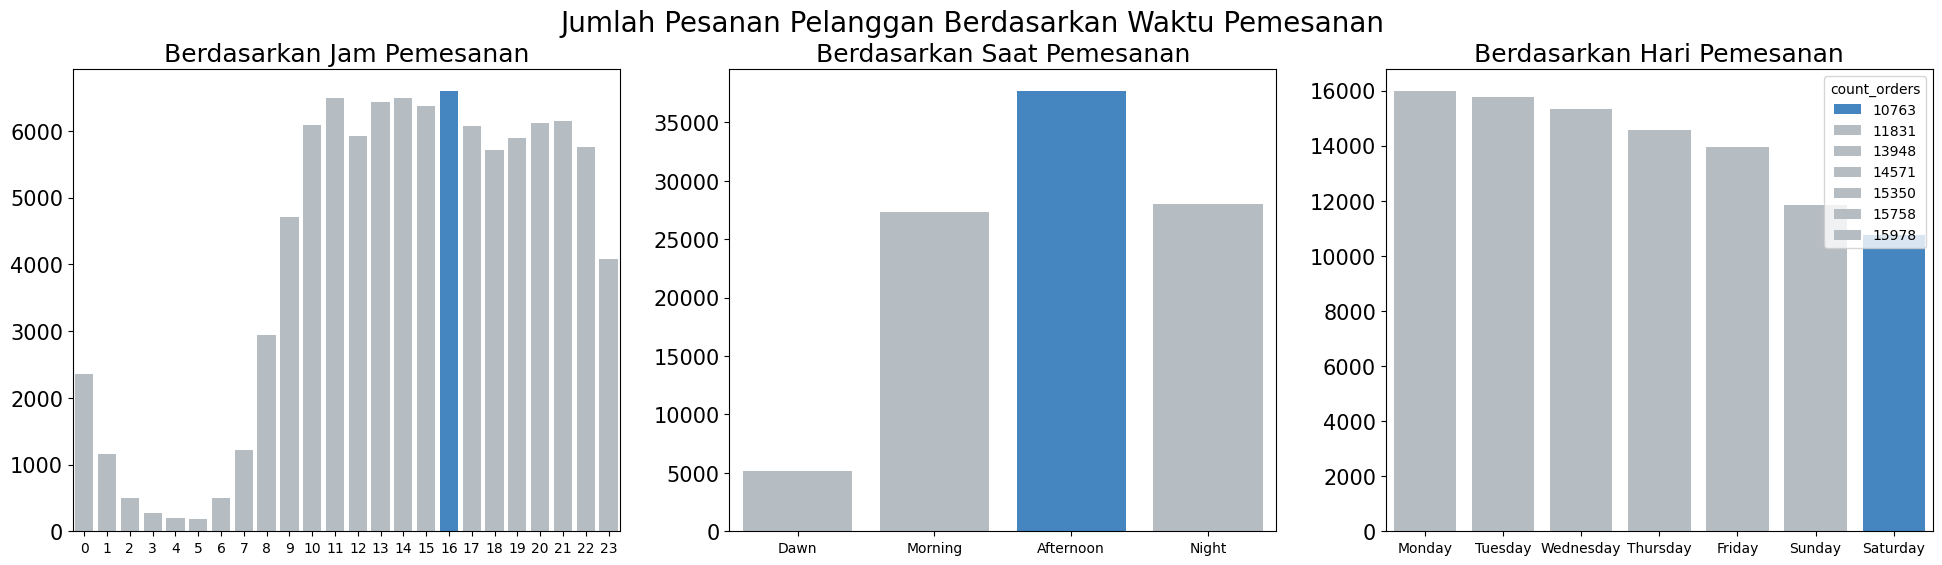

In [174]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="hour_order",
            y="count_orders",
            data= count_hour_order,
            palette= set_custom_palette(count_hour_order.count_orders),
            hue="hour_order",
            legend=False,
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Jam Pemesanan", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="daytime_order",
            y="count_orders",
            data= count_daytime_order,
            hue="daytime_order",
            palette= set_custom_palette(count_daytime_order.count_orders),
            ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Saat Pemesanan", loc="center", fontsize=18)
ax[1].tick_params(axis ='y', labelsize=15)

sns.barplot(x="day_order",
            y="count_orders",
            data= day_order_df,
            hue="count_orders",
            palette=colors,
            ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Hari Pemesanan", loc="center", fontsize=18)
ax[2].tick_params(axis='y', labelsize=15)

plt.suptitle("Jumlah Pesanan Pelanggan Berdasarkan Waktu Pemesanan", fontsize=20)
plt.show()

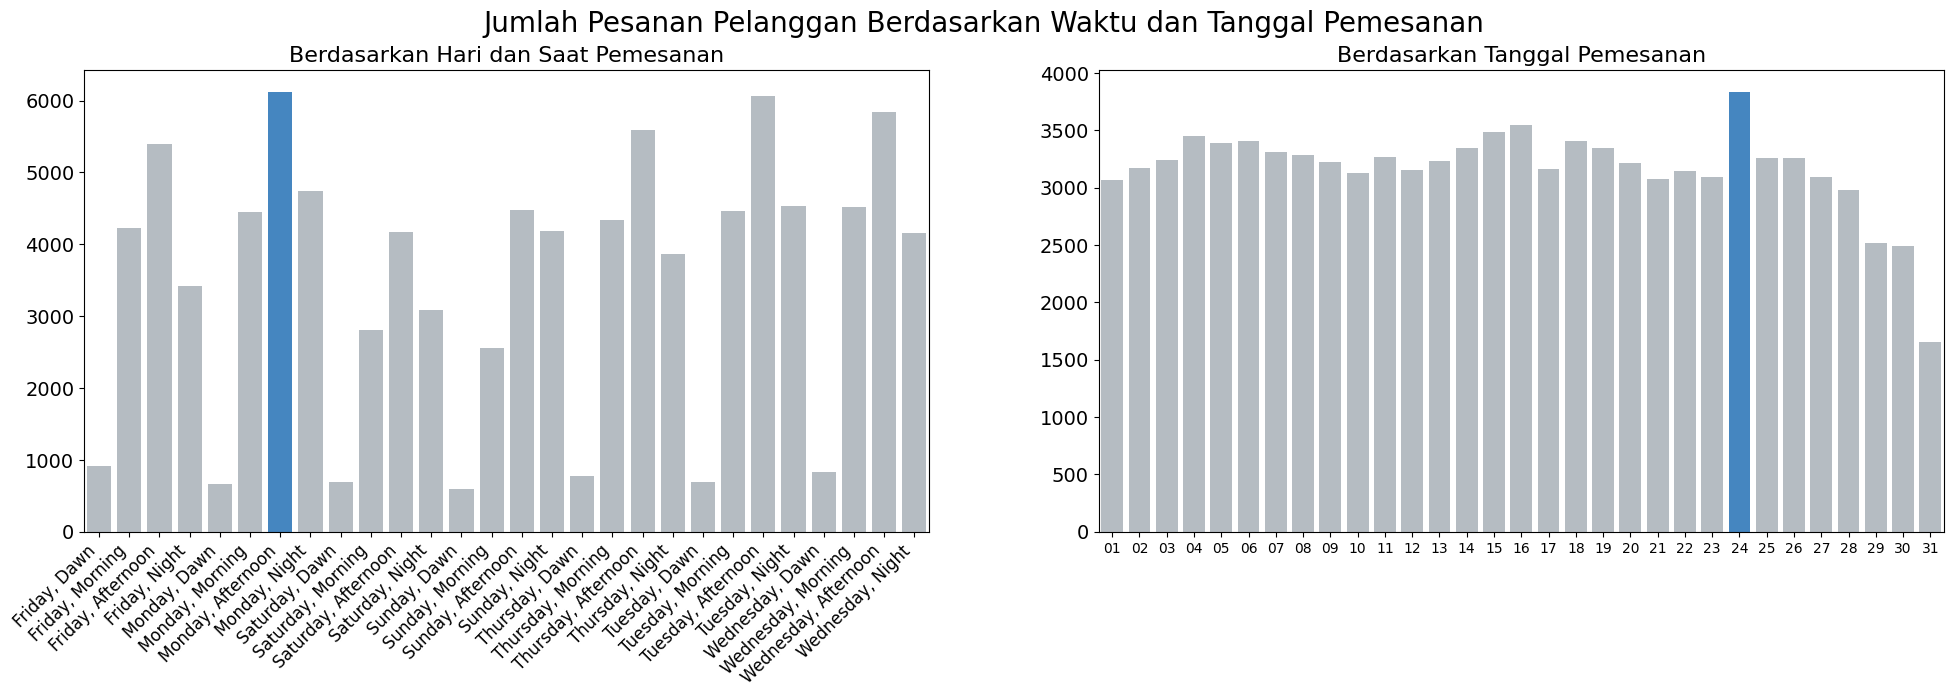

In [175]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="time_order",
            y="count_orders",
            data= count_time_order,
            palette= set_custom_palette(count_time_order.count_orders),
            hue="time_order",
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Hari dan Saat Pemesanan", loc="center", fontsize=16)
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
ax[0].tick_params(axis ='y', labelsize=14)

sns.barplot(x="date_order",
            y="count_orders",
            data= count_date_order,
            palette= set_custom_palette(count_date_order.count_orders),
            hue="date_order",
            ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Tanggal Pemesanan", loc="center", fontsize=16)
ax[1].tick_params(axis ='y', labelsize=14)

plt.suptitle("Jumlah Pesanan Pelanggan Berdasarkan Waktu dan Tanggal Pemesanan", fontsize=20)
plt.show()

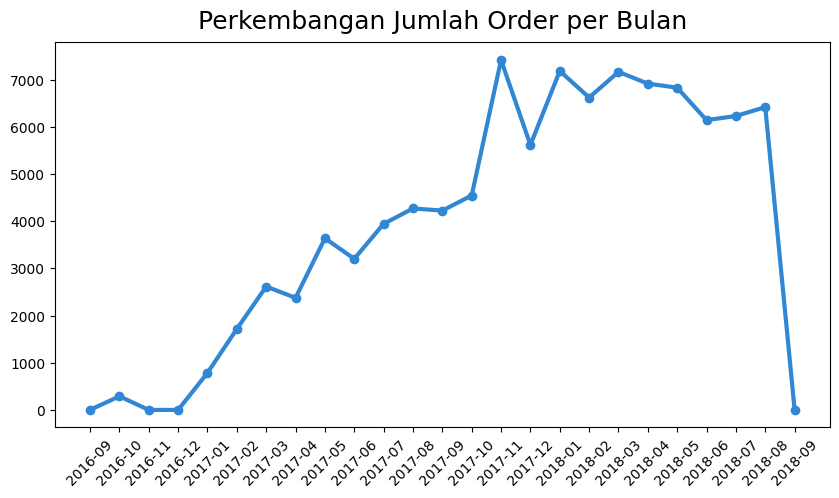

In [176]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders.month_order,
    monthly_orders.count_order,
    marker= 'o',
    linewidth= 3,
    color= "#3187d4"
    )
plt.title("Perkembangan Jumlah Order per Bulan" , loc="center", fontsize=18, pad=10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.show()

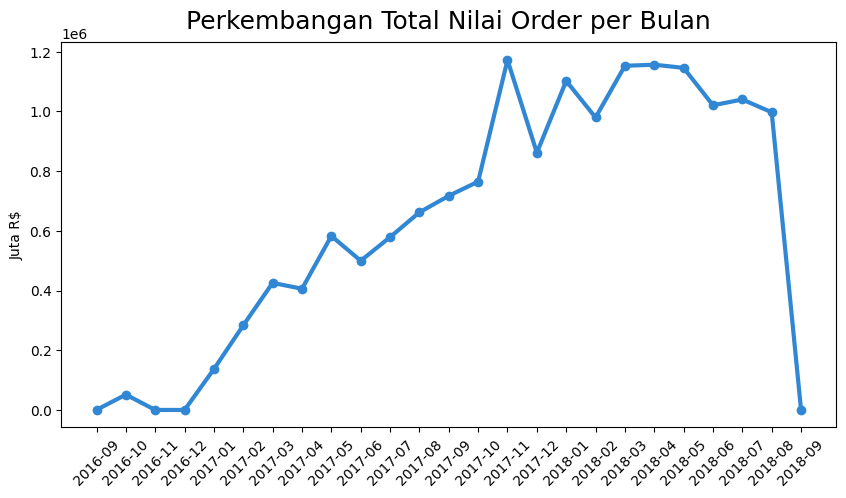

In [177]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders.month_order,
    monthly_orders.sum_order_value,
    marker= 'o',
    linewidth= 3,
    color= "#3187d4"
    )
plt.title("Perkembangan Total Nilai Order per Bulan" , loc="center", fontsize=18, pad=10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.ylabel('Juta R$', fontsize=10)

plt.show()

**Insight:**
- Pemesanan terbanyak berdasarkan jam pemesanan yaitu pada saat pukul 16.00, lalu berdasarkan saat pemesanan yaitu pada siang hari, dan berdasarkan hari pemesanan yaitu  pada hari Senin.
- Pemesanan terbanyak berdasarkan waktu pemesanan yaitu pada hari Senin di siang hari, serta berdasarkan tanggal pemesanan yaitu pada tanggal 24.
- Jumlah order per bulan mengalami perkembangan dengan nilai tertingginya terjadi pada bulan November 2017, setelah bulan tersebut mengalami fluktuasi cenderung stabil hingga Agustus 2018.
- Sama halnya dengan jumlah order per bulan, total nilai order pun mengalami perkembangan dengan nilai tertingginya terjadi pada bulan November 2017, setelah bulan tersebut mengalami fluktuasi cenderung stabil hingga Agustus 2018.

### Pertanyaan 2: Produk dalam kategori apa saja yang paling sering dan paling jarang dipesan?

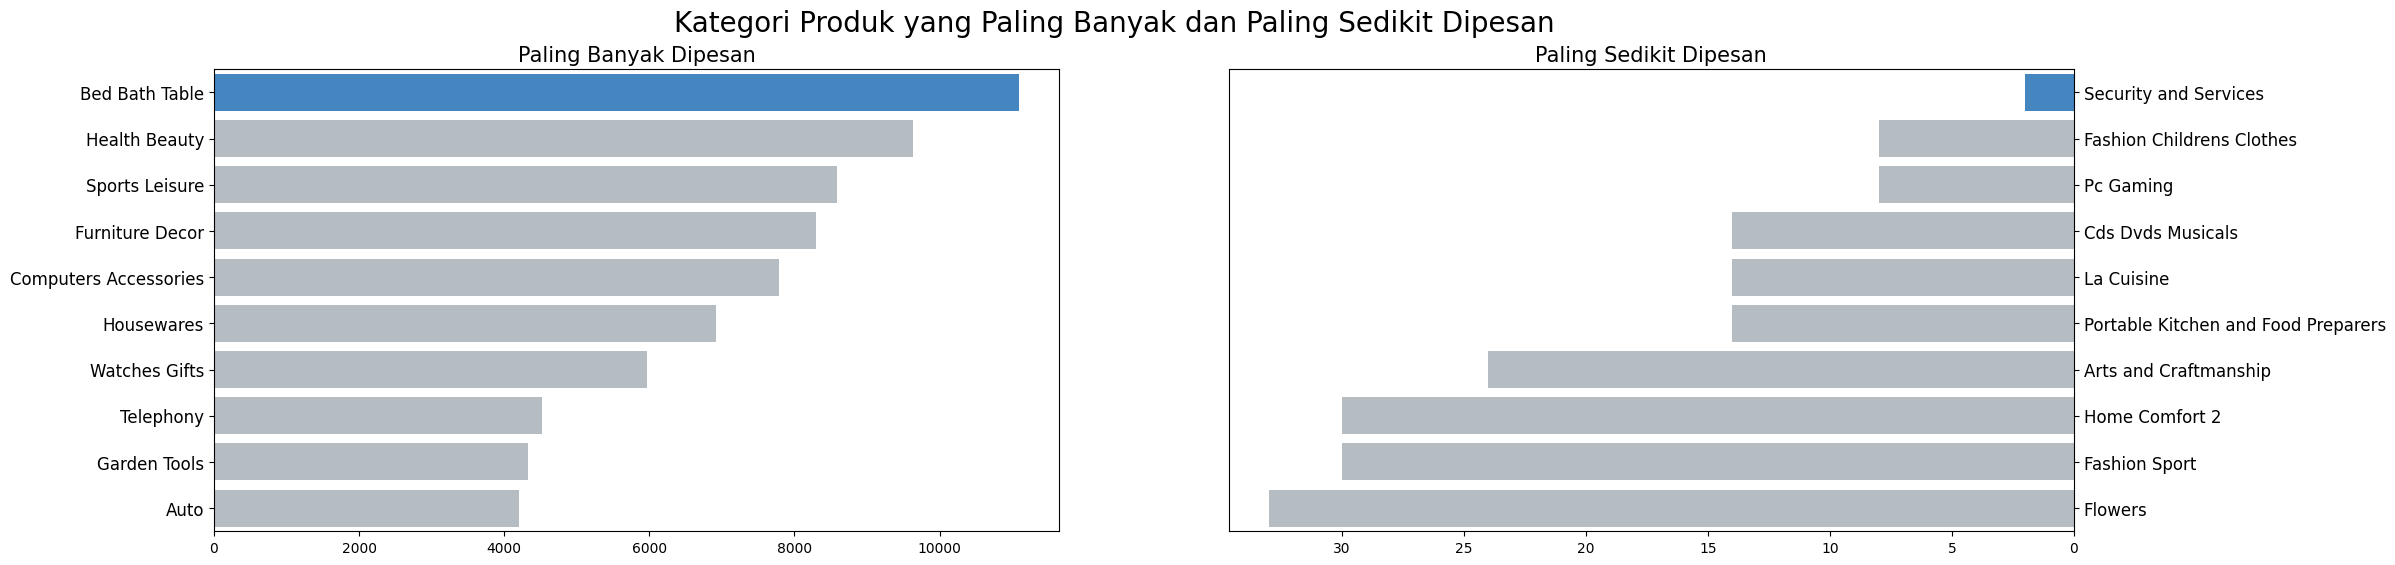

In [178]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]
sns.barplot(
    x="num_of_order",
    y="product_category",
    data= order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10), hue="product_category",
    palette=colors,
    ax=ax[0]
    )
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Paling Banyak Dipesan", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x="num_of_order",
    y="product_category",
    data= order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=True).head(10),  hue="product_category",
    palette=colors,
    ax=ax[1]
    )
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Paling Sedikit Dipesan", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
plt.suptitle("Kategori Produk yang Paling Banyak dan Paling Sedikit Dipesan", fontsize=20)
plt.show()

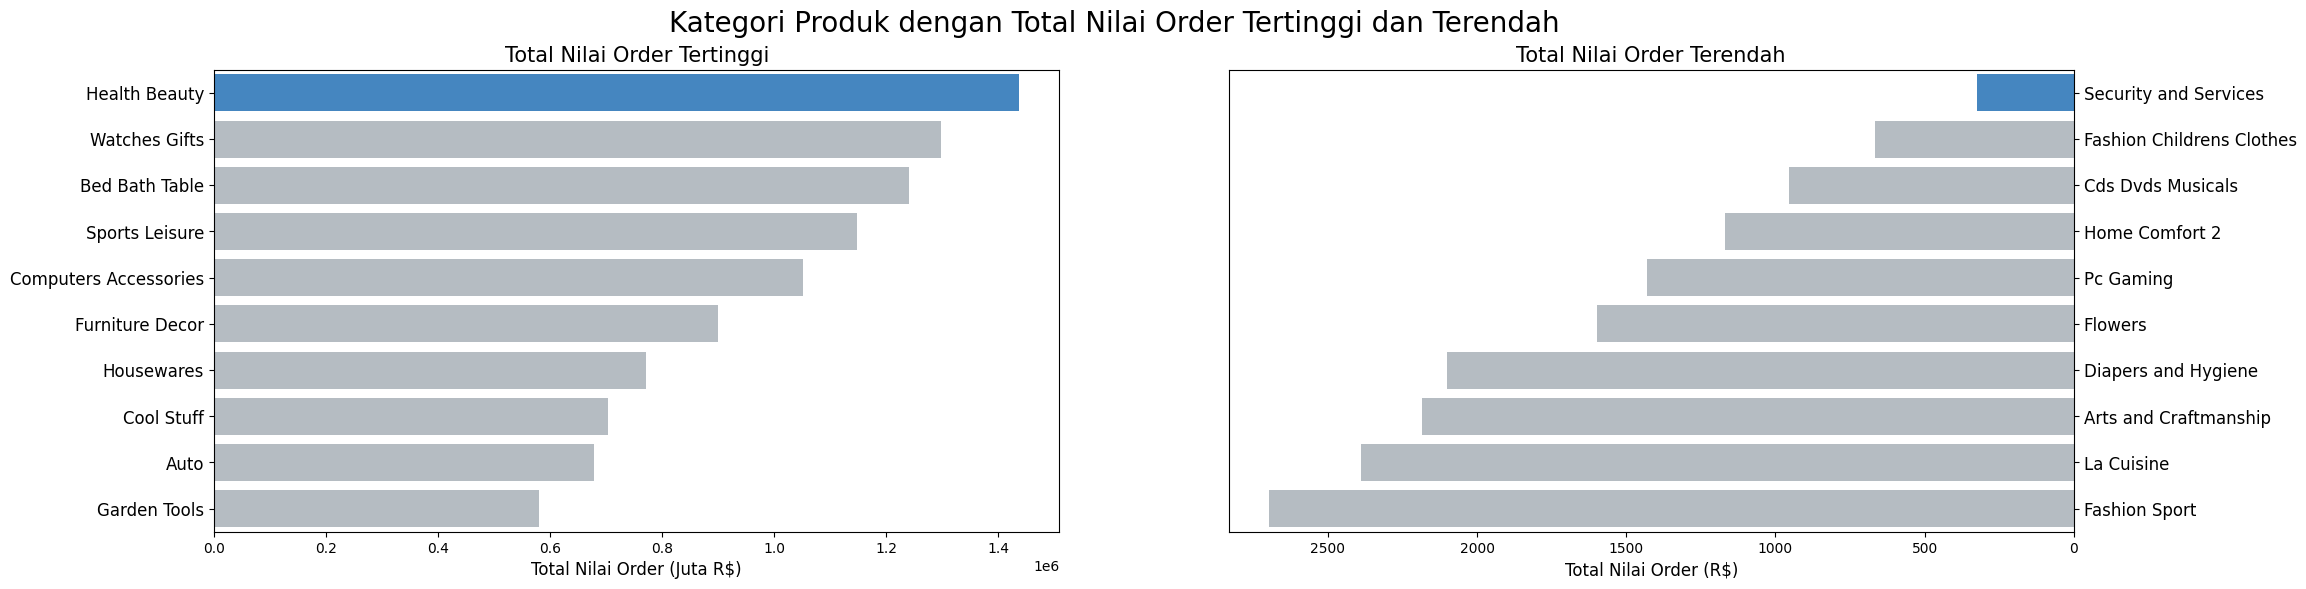

In [179]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]
sns.barplot(
    x="sum_order_value",
    y="product_category",
    data= order_by_product_category.sort_values(by='sum_order_value', ascending=False).head(10),
    palette=colors, hue="product_category",
    ax=ax[0]
    )
ax[0].set_ylabel(None)
ax[0].set_xlabel('Total Nilai Order (Juta R$)', fontsize=12)
ax[0].set_title("Total Nilai Order Tertinggi", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x="sum_order_value",
    y="product_category",
    data= order_by_product_category.sort_values('sum_order_value', ascending=True).head(10),
    palette=colors, hue="product_category",
    ax=ax[1]
    )
ax[1].set_ylabel(None)
ax[1].set_xlabel('Total Nilai Order (R$)', fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Total Nilai Order Terendah", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
plt.suptitle("Kategori Produk dengan Total Nilai Order Tertinggi dan Terendah", fontsize=20)
plt.show()

**Insight:**
- Kategori produk yang paling banyak dipesan yaitu Bed Bath Table, sebaliknya yaitu Security and Services yang paling sedikit dipesan.
- Kategori produk yang memiliki total nilai order tertinggi yaitu Health Beauty, sebaliknya yaitu Security and Services yang memiliki total nilai order terendah.

### Pertanyaan 3: Siapa pelanggan yang paling sering melakukan pemesanan, serta bagaimana distribusi pelanggan berdasarkan kota dan negara bagian?

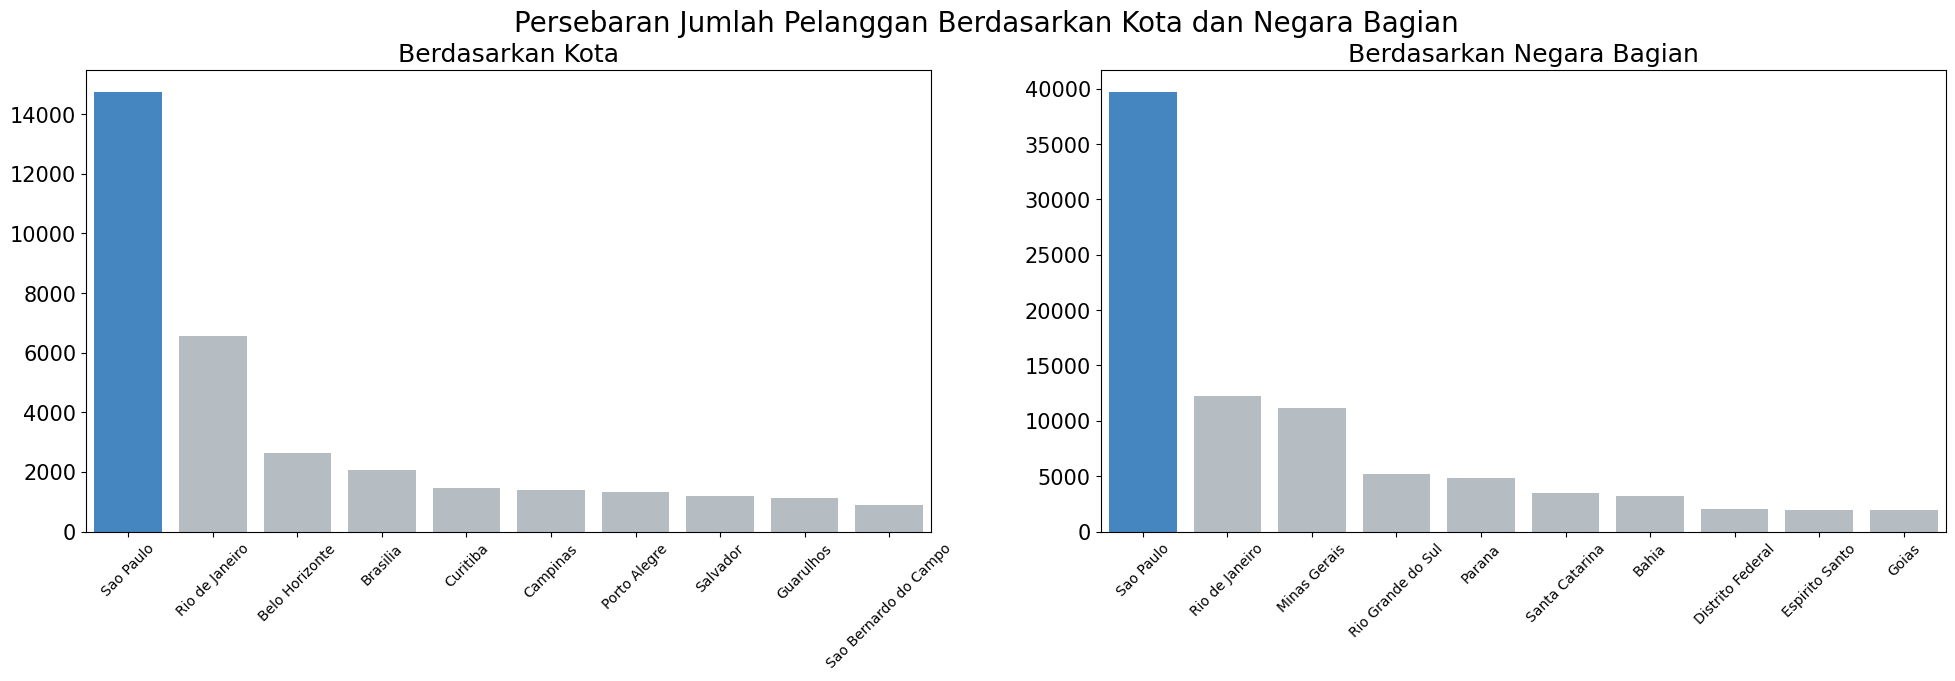

In [180]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="customer_state", y="count_customers", data= customers_in_states, hue="customer_state", palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Berdasarkan Negara Bagian", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

sns.barplot(x="customer_city", y="count_customers", data= customers_in_cities, hue="customer_city", palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Berdasarkan Kota", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

plt.suptitle("Persebaran Jumlah Pelanggan Berdasarkan Kota dan Negara Bagian", fontsize=20)
plt.show()

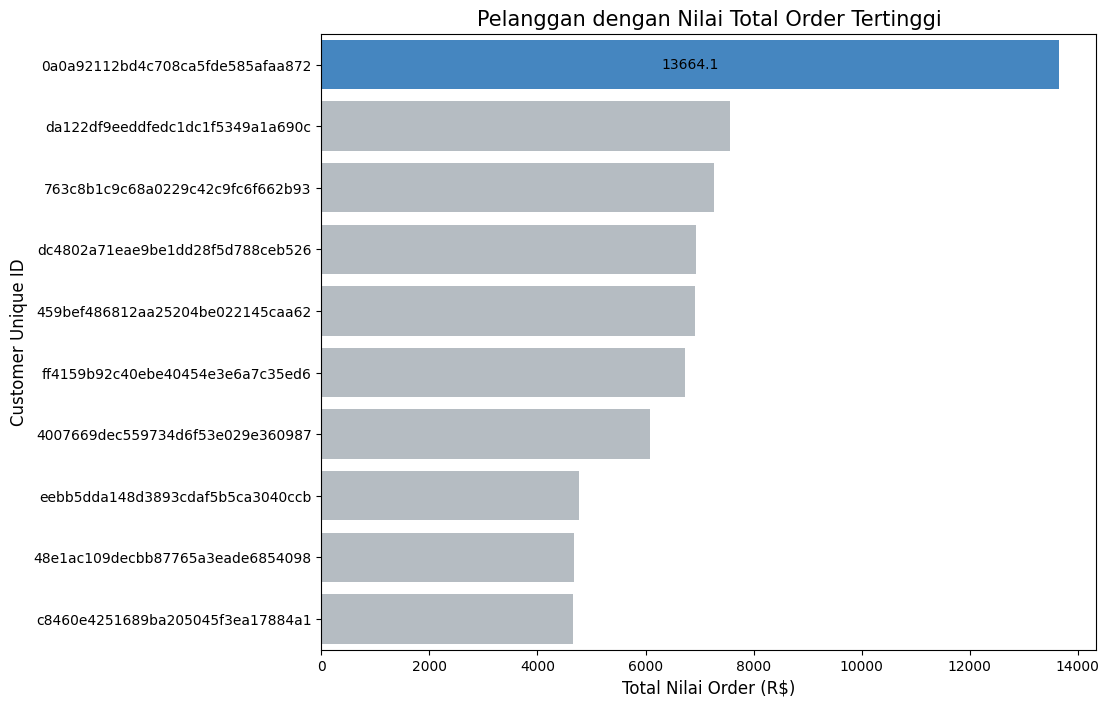

In [181]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="sum_order_value", y="customer_unique_id", data= sum_order_sorted, hue="customer_unique_id", palette=colors)
ax.set_ylabel('Customer Unique ID', fontsize=12)
ax.set_xlabel('Total Nilai Order (R$)', fontsize=12)
ax.set_title("Pelanggan dengan Nilai Total Order Tertinggi", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

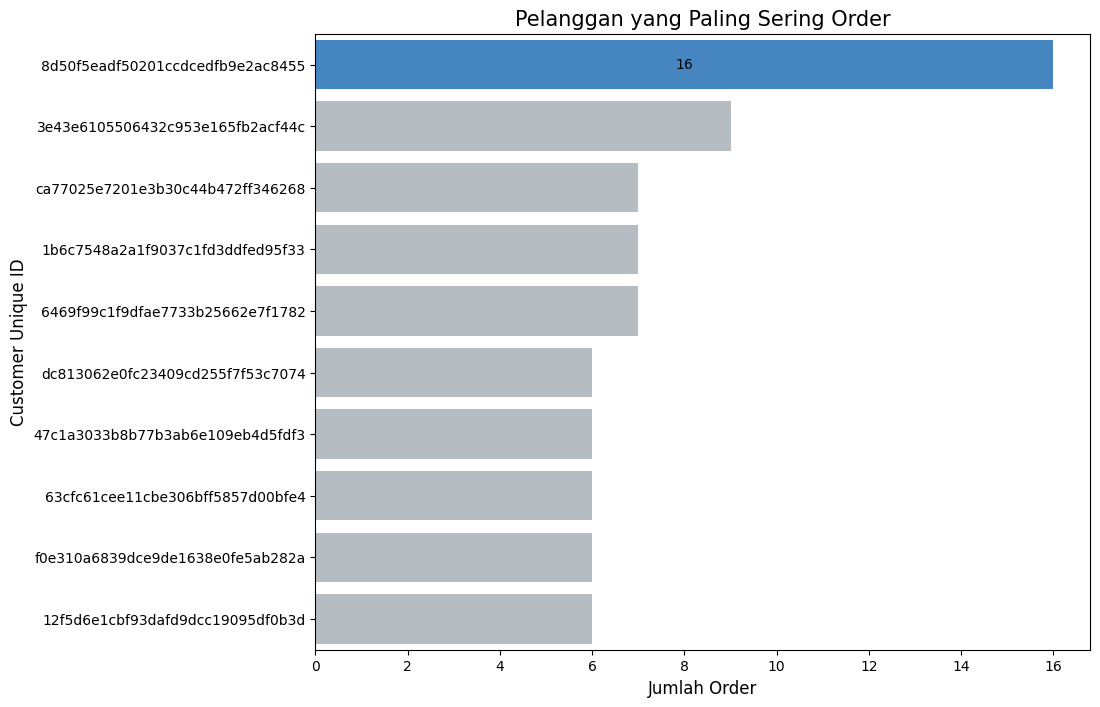

In [182]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="count_order", y="customer_unique_id", data= count_order_sorted, hue="customer_unique_id", palette=colors)
ax.set_ylabel('Customer Unique ID', fontsize=12)
ax.set_xlabel('Jumlah Order', fontsize=12)
ax.set_title("Pelanggan yang Paling Sering Order", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

**Insight:**
- Jumlah pelanggan terbanyak berasal dari kota Sao Paulo dan Rio de Janeiro, serta dari negara bagian Sao Paulo, Rio de Janeiro, dan Minas Gerais.
- Pelanggan dengan ID "0a0a92112bd4c708ca5fde585afaa872" melakukan order dengan total nilai order tertinggi dengan nilai sebesar 13.664,1.
- Pelanggan dengan ID "8d50f5eadf50201ccdcedfb9e2ac8455" melakukan order paling sering sebanyak 16 kali.

### Pertanyaan 4: Siapa penjual yang memiliki volume penjualan tertinggi, serta bagaimana distribusi penjual berdasarkan kota dan negara bagian?

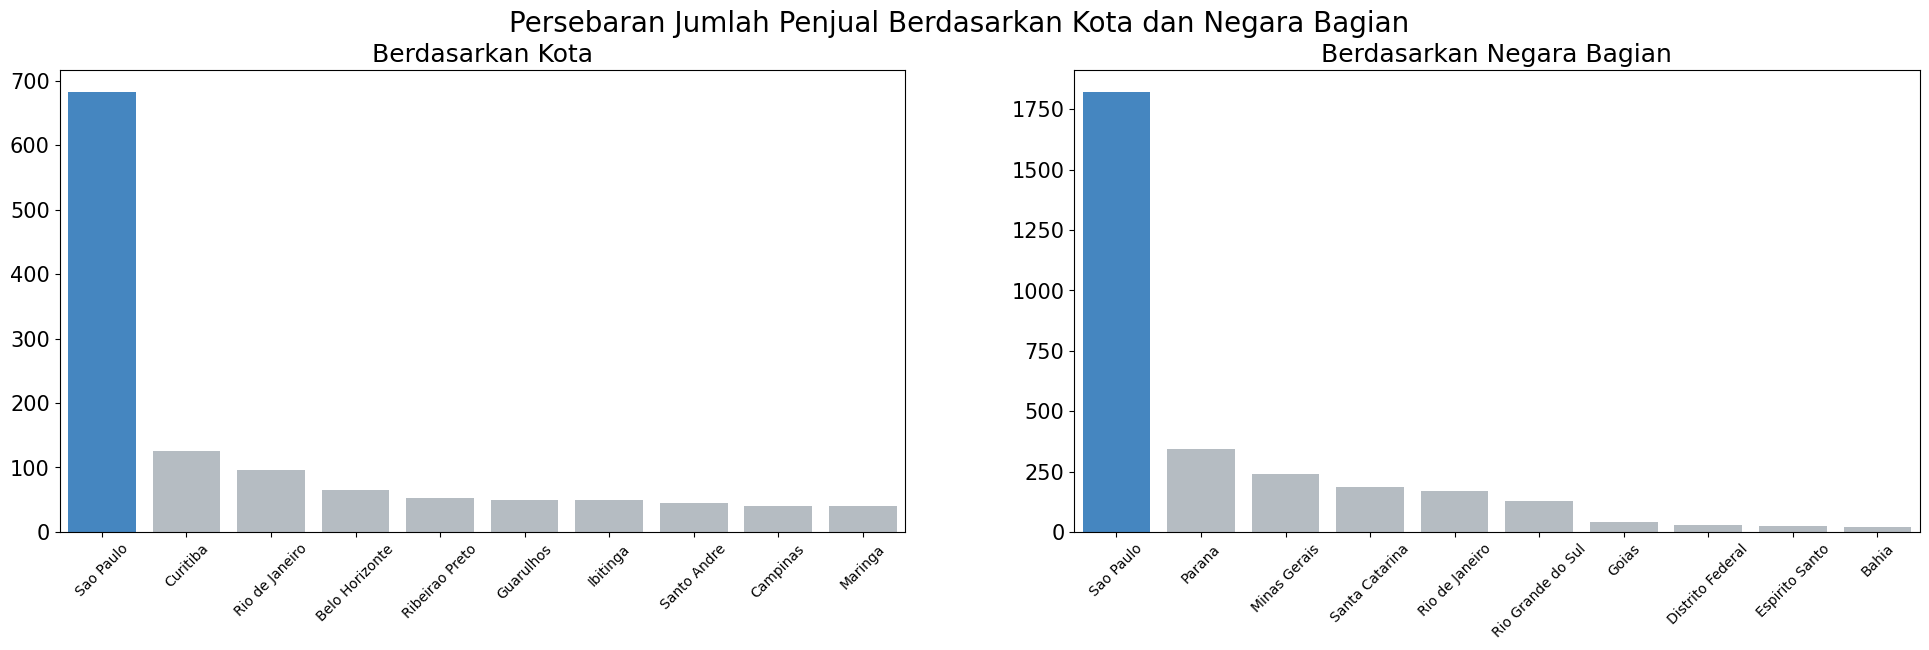

In [183]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="seller_state", y="count_sellers", data= sellers_in_states, hue="seller_state", palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Berdasarkan Negara Bagian", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

sns.barplot(x="seller_city", y="count_sellers", data= sellers_in_cities, hue="seller_city", palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Berdasarkan Kota", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

plt.suptitle("Persebaran Jumlah Penjual Berdasarkan Kota dan Negara Bagian", fontsize=20)
plt.show()

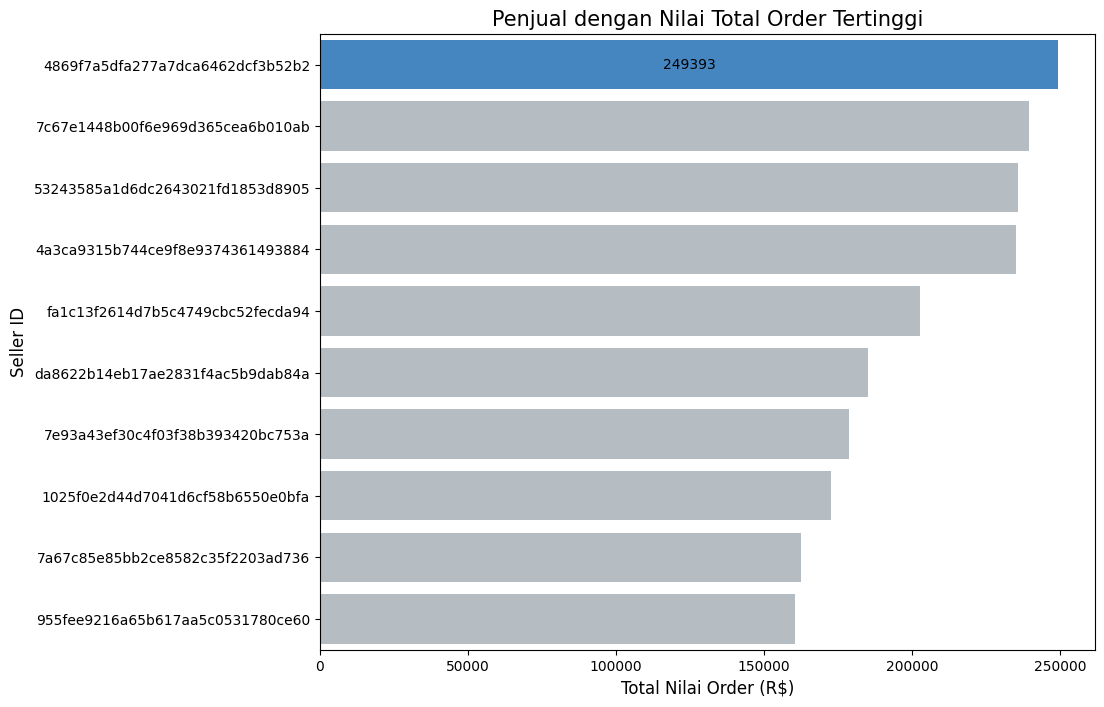

In [184]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="sum_order_value", y="seller_id", data= seller_sum_order_sorted, hue="seller_id", palette=colors)
ax.set_ylabel('Seller ID', fontsize=12)
ax.set_xlabel('Total Nilai Order (R$)', fontsize=12)
ax.set_title("Penjual dengan Nilai Total Order Tertinggi", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

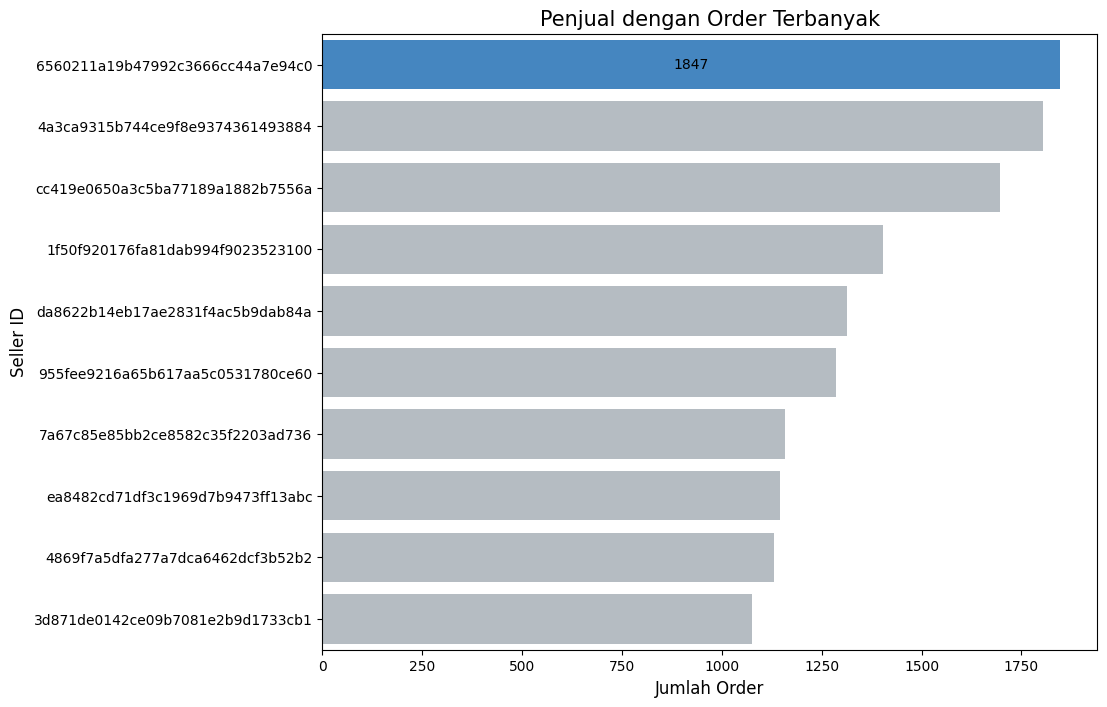

In [185]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="count_order", y="seller_id", data= seller_count_order_sorted, hue="seller_id", palette=colors)
ax.set_ylabel('Seller ID', fontsize=12)
ax.set_xlabel('Jumlah Order', fontsize=12)
ax.set_title("Penjual dengan Order Terbanyak", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

**Insight:**
- Jumlah penjual ada di kota Sao Paulo dan Curitiba, serta di negara bagian Sao Paulo, Parana, dan Minas Gerais.
- Penjual dengan ID "4869f7a5dfa277a7dca6462dcf3b52b2" memiliki total nilai order tertinggi senilai 249.393.
- Penjual dengan ID "6560211a19b47992c3666cc44a7e94c0" mendapatkan order terbanyak sebanyak 1.847 kali.

## Analisis Lanjutan

## Conclusion

- Bagaimana pola dan perubahan dalam aktivitas pemesanan pelanggan dari waktu ke waktu?
> Pemesanan tertinggi berdasarkan jam terjadi pada pukul 16.00. Dari segi waktu, pemesanan paling banyak dilakukan pada Senin siang, sedangkan berdasarkan tanggal, pesanan terbanyak tercatat pada tanggal 24 setiap bulannya. Jumlah pesanan dan total nilai pemesanan menunjukkan peningkatan, dengan puncaknya terjadi pada November 2017. Setelah itu, terjadi fluktuasi yang relatif stabil hingga Agustus 2018.
---


- Produk dalam kategori apa saja yang paling sering dan paling jarang dipesan?
> Berdasarkan jumlah pesanan, kategori produk yang paling sering dipesan adalah **Bed Bath Table**, **Health Beauty**, dan **Sports Leisure**, sedangkan kategori dengan pesanan paling sedikit adalah **Security and Services**, **Pc Gaming**, dan **Fashion Childrens Clothes**. Sementara itu, jika dilihat dari total nilai pemesanan, kategori dengan nilai tertinggi adalah **Health Beauty**, **Watches Gifts**, dan **Bed Bath Table**, sedangkan kategori dengan nilai terendah adalah **Security and Services**, **Fashion Childrens Clothes**, dan **Cds Dvds Musicals**.
---


- Siapa pelanggan yang paling sering melakukan pemesanan, serta bagaimana distribusi pelanggan berdasarkan kota dan negara bagian?
> Sebagian besar transaksi dilakukan oleh pelanggan yang berasal dari kota São Paulo dan Rio de Janeiro, serta negara bagian São Paulo dan Rio de Janeiro. Pelanggan dengan ID "8d50f5eadf50201ccdcedfb9e2ac8455" memiliki frekuensi pemesanan tertinggi, yaitu sebanyak 16 kali. Sementara itu, pelanggan dengan ID "0a0a92112bd4c708ca5fde585afaa872" mencatat total nilai pemesanan tertinggi, mencapai 13.664,1.
---


- Siapa penjual yang memiliki volume penjualan tertinggi, serta bagaimana distribusi penjual berdasarkan kota dan negara bagian?
> Sebagian besar penjual berasal dari kota São Paulo, Curitiba, dan Rio de Janeiro, serta dari negara bagian São Paulo, Paraná, dan Minas Gerais. Penjual dengan ID "6560211a19b47992c3666cc44a7e94c0" menerima pesanan terbanyak, yaitu sebanyak 1.847 kali. Sementara itu, penjual dengan total nilai pemesanan tertinggi adalah penjual dengan ID "4869f7a5dfa277a7dca6462dcf3b52b2," dengan total nilai pemesanan mencapai 249.393.
---

In [224]:
#convert data join_table_df ke csv
join_table_df.to_csv('main_data_for_dashboard.csv', index=False)